In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.constraints import maxnorm, nonneg, unit_norm
import gc
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


## Permutation matrices

In [ ]:
def generate_per_matrix(n):
    #P = np.zeros((n,n)).astype(np.int64)
    atom = np.arange(n)
    P = np.array([np.roll(atom, shift=i) for i in np.arange(n)])
    return P

In [ ]:
from itertools import permutations

Z2 = [[0, 1], [1, 0]]
Z4 = [[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]
Z5 = [[0, 1, 2, 3, 4], [1, 2, 3, 4, 0], [2, 3, 4, 0, 1], [3, 4, 0, 1, 2], [4, 0, 1, 2, 3]]
Z8 = [[0, 1, 2, 3, 4, 5, 6, 7], [7, 0, 1, 2, 3, 4, 5, 6], [6, 7, 0, 1, 2, 3, 4, 5], [5, 6, 7, 0, 1, 2, 3, 4],
      [4, 5, 6, 7, 0, 1, 2, 3], [3, 4, 5, 6, 7, 0, 1, 2], [2, 3, 4, 5, 6, 7, 0, 1], [1, 2, 3, 4, 5, 6, 7, 0]]
      

Z4 = [[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]
Z5 = [[0, 1, 2, 3, 4], [1, 2, 3, 4, 0], [2, 3, 4, 0, 1], [3, 4, 0, 1, 2], [4, 0, 1, 2, 3]]
perm = [[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2],
        [3, 2, 1, 0], [2, 1, 0, 3], [1, 0, 3, 2], [0, 3, 2, 1]]
D8 = [list(x) + [4] for x in perm]
perm = [[0, 1, 2, 3], [1, 2, 0, 3], [2, 0, 1, 3], [3, 0, 2, 1], [1, 3, 2, 0], [3, 1, 0, 2], [2, 1, 3, 0],
        [0, 3, 1, 2], [0, 2, 3, 1], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
A4 = [list(x) + [4] for x in perm]
perm = list(permutations(range(4)))
S4 = [list(x) + [4] for x in perm]
perm = list(permutations(range(3)))
S3 = [list(x) + [3, 4] for x in perm]

Z5_Z10 = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [4, 0, 1, 2, 3, 5, 6, 7, 8, 9],
          [3, 4, 0, 1, 2, 5, 6, 7, 8, 9], [2, 3, 4, 0, 1, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 0, 5, 6, 7, 8, 9]]

Z16 = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
       [13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
       [10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8], [8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7],
       [7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5], [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4],
       [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1],
       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]]

Z2_Z16 = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

Z4_Z16 = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [3, 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
          [2, 3, 0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

Z8_Z16 = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15],
          [6, 7, 0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15], [5, 6, 7, 0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15],
          [4, 5, 6, 7, 0, 1, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15], [3, 4, 5, 6, 7, 0, 1, 2, 8, 9, 10, 11, 12, 13, 14, 15],
          [2, 3, 4, 5, 6, 7, 0, 1, 8, 9, 10, 11, 12, 13, 14, 15], [1, 2, 3, 4, 5, 6, 7, 0, 8, 9, 10, 11, 12, 13, 14, 15]]

Z10 = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [9, 0, 1, 2, 3, 4, 5, 6, 7, 8],
      [8, 9, 0, 1, 2, 3, 4, 5, 6, 7],  [7, 8, 9, 0, 1, 2, 3, 4, 5, 6],
      [6, 7, 8, 9, 0, 1, 2, 3, 4, 5],  [5, 6, 7, 8, 9, 0, 1, 2, 3, 4],
      [4, 5, 6, 7, 8, 9, 0, 1, 2, 3],  [3, 4, 5, 6, 7, 8, 9, 0, 1, 2],
      [2, 3, 4, 5, 6, 7, 8, 9, 0, 1],  [1, 2, 3, 4, 5, 6, 7, 8, 9, 0,]]                      

## Polynomial functions

In [ ]:
def poly_Z5(x):
    def inv1(a, b):
        return a * b ** 2

    a, b, c, d, e = tf.unstack(x, axis=1)
    q1 = inv1(a, b) + inv1(b, c) + inv1(c, d) + inv1(d, e) + inv1(e, a)
    return q1

def poly_Z5_Z10(x):
    def inv1(a, b):
        return a * b ** 2

    a, b, c, d, e, f , g , h, i, j  = tf.unstack(x, axis=1)
    q1 = inv1(a, b) + inv1(b, c) + inv1(c, d) + inv1(d, e) + inv1(e, a)
    return q1

def poly_Zk_Zn(x, indices):
    def inv1(a, b):
        return a * b ** 2

    unstacked_variables  = tf.unstack(x, axis=1)
    #print("Before:",unstacked_variables)
    #unstacked_variables = unstacked_variables[indices]
    unstacked_variables = tf.gather(unstacked_variables, indices)

    #print("After:",unstacked_variables)

    q1 = 0
    for i in np.arange(len(indices)-1):
        q1 += inv1(unstacked_variables[i], unstacked_variables[i+1])
    q1 += inv1(unstacked_variables[len(indices)-1], unstacked_variables[0])        
    #q1 = inv1(a, b) + inv1(b, c) + inv1(c, d) + inv1(d, e) + inv1(e, a)
    return q1


def poly_D8(x):
    def inv1(a, b):
        return a * b ** 2

    a, b, c, d, e = tf.unstack(x, axis=1)
    q1 = inv1(a, b) + inv1(b, c) + inv1(c, d) + inv1(d, a) + \
         inv1(b, a) + inv1(c, b) + inv1(d, c) + inv1(a, d)
    return q1 + e


def poly_A4(x):
    a, b, c, d, e = tf.unstack(x, axis=1)
    q1 = a * b + c * d
    q2 = a * c + b * d
    q3 = a * d + b * c
    q4 = a * b * c + a * b * d + a * c * d + b * c * d

    return q1 + q2 + q3 + q4 + e


def poly_S4(x):
    a, b, c, d, e = tf.unstack(x, axis=1)
    q1 = a * b * c * d
    return q1 + e


def poly_S3xS2(x):
    a, b, c, d, e = tf.unstack(x, axis=1)
    q1 = a*b*c + d + e
    return q1

def poly_S3(x):
    a, b, c, d, e = tf.unstack(x, axis=1)
    q1 = a * b * c + 2 * d + e
    return q1

def poly_Z3(x):
    def inv1(a, b):
        return a * b ** 2

    a, b, c, d, e = tf.unstack(x, axis=1)
    q1 = inv1(a, b) + inv1(b, c) + inv1(c, a) + 2 * d + e
    return q1

## Create data

        Ground truth: 
$\mathbb{Z}_5$

In [ ]:
np.random.seed(1024)
ts = 1
vs = 30
batch_size = 16
train_size = int(batch_size * ts)
val_size = int(batch_size * vs)
d = 5
train_ds = np.random.rand(ts*batch_size, d)
val_ds = np.random.rand(vs*batch_size, d)
train_y = poly_Z5(train_ds).numpy()
val_y = poly_Z5(val_ds).numpy()

print("Shape info:",[train_ds.shape, train_y.shape, val_ds.shape, val_y.shape])

Shape info: [(16, 5), (16,), (480, 5), (480,)]


## Utils

In [ ]:
def apply_layers(x, layers):
    for l in layers:
        x = l(x)
    return x

def sigmaPi(fin, m, n, p):
    fin = tf.transpose(fin, (0, 2, 1, 3))
    fin = fin[:, :, tf.newaxis]
    fin = tf.tile(fin, (1, 1, m, 1, 1))
    y = fin @ p
    y = tf.linalg.diag_part(y)
    y = tf.reduce_prod(y, axis=3)
    y = tf.reduce_sum(y, axis=2)
    return y


def prepare_permutation_matices(perm, n, m):
    p1 = np.eye(n, dtype=np.float32)
    p = np.tile(p1[np.newaxis], (m, 1, 1))
    for i, x in enumerate(perm):
        p[i, x, :] = p1[np.arange(n)]
    return p

## Custom layer: SigmaPi

In [ ]:
class SigmaPi(keras.layers.Layer):
    def __init__(self, m, n, p):
        super(SigmaPi, self).__init__()
        self.m = m
        self.n = n
        self.p = p

    def call(self, inputs):
        inputs = tf.transpose(inputs, (0, 2, 1, 3))
        inputs = inputs[:, :, tf.newaxis]
        inputs = tf.tile(inputs, (1, 1, self.m, 1, 1))
        y = inputs @ self.p
        y = tf.linalg.diag_part(y)
        y = tf.reduce_prod(y, axis=3)
        y = tf.reduce_sum(y, axis=2)        
        return tf.matmul(inputs, self.w) + self.b

## Ground Truth: Sum Of Products

In [ ]:
class GroupInvariance(tf.keras.Model):
    def __init__(self, perm, num_features):
        super(GroupInvariance, self).__init__()
        activation=tf.keras.activations.tanh

        self.num_features = num_features
        self.n = len(perm[0])
        self.m = len(perm)
        self.p = prepare_permutation_matices(perm, self.n, self.m)

        self.features = [
            tf.keras.layers.Dense(16, activation),
            tf.keras.layers.Dense(64, activation),
            tf.keras.layers.Dense(self.n * self.num_features, tf.keras.activations.sigmoid),
            #tf.keras.layers.Dense(self.n * self.num_features, None),
        ]

        self.fc = [
            #tf.keras.layers.Dense(32, tf.keras.activations.tanh),
            tf.keras.layers.Dense(32, tf.keras.activations.relu, use_bias=False),
            tf.keras.layers.Dense(1),
        ]

    def call(self, inputs):
        x = inputs[:, :, tf.newaxis]
        x = apply_layers(x, self.features)
        x = tf.reshape(x, (-1, self.n, self.num_features, self.n))
        x = sigmaPi(x, self.m, self.n, self.p)
        x = apply_layers(x, self.fc)
        return x

## Run Ground Truth

        Run GT
$$\mathbb{Z}_5$$ 

        Train Error = 0.0024
        Val Error = 0.07

In [ ]:
np.random.seed(2048)
Model = GroupInvariance(Z5, 64)
adam = Adam(lr=1e-3)
Model.compile(optimizer=adam, loss='mae')

In [ ]:
max_epochs = 2500
Model.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=16,
          shuffle=True, validation_data=(val_ds, val_y))

Epoch 1/2500
16/16 [==============================] - 1s 17ms/step - loss: 0.4814 - val_loss: 0.4331
Epoch 2/2500
16/16 [==============================] - 0s 8ms/step - loss: 0.4182 - val_loss: 0.3583
Epoch 3/2500
16/16 [==============================] - 0s 7ms/step - loss: 0.3894 - val_loss: 0.3360
Epoch 4/2500
16/16 [==============================] - 0s 7ms/step - loss: 0.3432 - val_loss: 0.2795
Epoch 5/2500
16/16 [==============================] - 0s 8ms/step - loss: 0.2885 - val_loss: 0.2531
Epoch 6/2500
16/16 [==============================] - 0s 8ms/step - loss: 0.2270 - val_loss: 0.1691
Epoch 7/2500
16/16 [==============================] - 0s 16ms/step - loss: 0.1801 - val_loss: 0.1434
Epoch 8/2500
16/16 [==============================] - 0s 17ms/step - loss: 0.1537 - val_loss: 0.1472
Epoch 9/2500
16/16 [==============================] - 0s 8ms/step - loss: 0.1421 - val_loss: 0.1369
Epoch 10/2500
16/16 [==============================] - 0s 8ms/step - loss: 0.1444 - val_loss: 0.1

KeyboardInterrupt: ignored

## Create Data for $\mathbb{Z}_5 : \mathbb{Z}_{10}$

In [ ]:
np.random.seed(1024)
ts = 32
vs = 480
batch_size = 1
train_size = int(batch_size * ts)
val_size = int(batch_size * vs)
d = 10
train_ds = np.random.rand(ts*batch_size, d)
val_ds = np.random.rand(vs*batch_size, d)

indices = np.array([0, 2, 4, 6, 8]).astype(np.int64)#np.arange(5).astype(np.int64)
train_y = poly_Zk_Zn(train_ds, indices).numpy()
val_y = poly_Zk_Zn(val_ds, indices).numpy()
print("Shape info:",[train_ds.shape, train_y.shape, val_ds.shape, val_y.shape])

Shape info: [(32, 10), (32,), (480, 10), (480,)]


## Create Data for $\mathbb{Z}_4 : \mathbb{Z}_{16}$

In [ ]:
np.random.seed(1024)
ts = 32
vs = 30
batch_size = 1
d = 16
train_ds = np.random.rand(ts*batch_size, d)
val_ds = np.random.rand(vs*batch_size, d)

indices = np.array([0, 1, 2, 3]).astype(np.int64)#np.arange(5).astype(np.int64)
train_y = poly_Zk_Zn(train_ds, indices).numpy()
val_y = poly_Zk_Zn(val_ds, indices).numpy()

## Create Data for $\mathbb{Z}_8 : \mathbb{Z}_{16}$

        Proposed: 
$\mathbb{Z}_8 : \mathbb{Z}_{16}$

In [ ]:
np.random.seed(1024)
ts = 64
vs = 480
batch_size = 1
d = 16
train_ds = np.random.rand(ts*batch_size, d)
val_ds = np.random.rand(vs*batch_size, d)


indices = np.array([5, 6, 7, 8, 9, 10, 12, 13]).astype(np.int64)#np.arange(5).astype(np.int64)
train_y = poly_Zk_Zn(train_ds, indices).numpy()
val_y = poly_Zk_Zn(val_ds, indices).numpy()

## Create Data for $\mathbb{Z}_8 : \mathbb{Z}_{512}$

In [ ]:
np.random.seed(1024)
ts = 1024
vs = 4096
batch_size = 1
d = 512
train_ds = np.random.rand(ts*batch_size, d)
val_ds = np.random.rand(vs*batch_size, d)

indices = np.array([0, 1, 3, 6, 7, 10, 12, 13]).astype(np.int64)#np.arange(5).astype(np.int64)
train_y = poly_Zk_Zn(train_ds, indices).numpy()
val_y = poly_Zk_Zn(val_ds, indices).numpy()

## Proposed $M$ + $G$-Invariant Net

In [ ]:
class Simple_FC(tf.keras.Model):
    def __init__(self):
        super(Simple_FC, self).__init__()
        activation = tf.keras.activations.tanh
        self.features = [
            tf.keras.layers.Dense(10, activation),
            tf.keras.layers.Dense(89, activation),
            tf.keras.layers.Dense(6 * 32, activation),
            tf.keras.layers.Dense(32, activation),
            tf.keras.layers.Dense(1),
        ]

    def call(self, inputs):
        x = apply_layers(inputs, self.features)
        return x

In [ ]:
def my_regularizer(x):
    #x = tf.abs(x) + 1e-8
    x = x/(tf.reduce_sum(x, axis=0))
    entropy = tf.reduce_mean(tf.reduce_sum(-x*tf.math.log(x), axis=0))
    return 1e-5 * entropy

lambda_val = 1e-02
l2_reg = tf.keras.regularizers.l2(1e-5)
class GroupInvarianceProposed(tf.keras.Model):
    def __init__(self, perm, num_features):
        super(GroupInvarianceProposed, self).__init__()
        activation=tf.keras.activations.tanh

        self.num_features = num_features
        self.n = len(perm[0])
        self.m = len(perm)
        self.p = prepare_permutation_matices(perm, self.n, self.m)
        self.d = self.n

        self.fc1 = tf.keras.layers.Dense(self.d, activation=None) 
                                         #kernel_regularizer=tf.keras.regularizers.l1(lambda_val),
                                         #kernel_constraint = nonneg())

        self.features = [
            tf.keras.layers.Dense(16, activation, kernel_regularizer=l2_reg),
            #tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(64, activation, kernel_regularizer=l2_reg),
            #tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(self.n * self.num_features, tf.keras.activations.sigmoid, kernel_regularizer=l2_reg),
            #tf.keras.layers.BatchNormalization(),
            #tf.keras.layers.Dense(self.n * self.num_features, None),
        ]

        self.fc = [
            #tf.keras.layers.Dense(32, tf.keras.activations.tanh),
            tf.keras.layers.Dense(32, tf.keras.activations.relu, use_bias=False, kernel_regularizer=l2_reg),
            #tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1, kernel_regularizer=l2_reg),
        ]

    def call(self, inputs):
        x = self.fc1(inputs)
        x = x[:, :, tf.newaxis]
        x = apply_layers(x, self.features)
        x = tf.reshape(x, (-1, self.n, self.num_features, self.n))
        x = sigmaPi(x, self.m, self.n, self.p)
        x = apply_layers(x, self.fc)
        return x

## Multiple trails: Recovery

In [ ]:
import random
import numpy as np
num_trails = 5
np.random.seed(1024)
#ts = 32
#vs = 480
total_train_samples = 32
total_val_samples = 480
#batch_size = 1
#train_size = int(batch_size * ts)
#val_size = int(batch_size * vs)
d = 10
k = 5
GT_indices = []
all_diff = []
all_estimates = []
patience = 200
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
import pandas as pd

def poly_Zk_Zn(x, indices):
    def inv1(a, b):
        return a * b ** 2

    unstacked_variables  = tf.unstack(x, axis=1)
    #print("Before:",unstacked_variables)
    #unstacked_variables = unstacked_variables[indices]
    unstacked_variables = tf.gather(unstacked_variables, indices)

    #print("After:",unstacked_variables)

    q1 = 0
    for i in np.arange(len(indices)-1):
        q1 += inv1(unstacked_variables[i], unstacked_variables[i+1])
    q1 += inv1(unstacked_variables[len(indices)-1], unstacked_variables[0])        
    #q1 = inv1(a, b) + inv1(b, c) + inv1(c, d) + inv1(d, e) + inv1(e, a)
    return q1

def save_pd(history, fileName):
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save to json:  
    hist_json_file = fileName + '_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)

    # save to csv: 
    hist_csv_file = fileName + '_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f) 

def extract_M(model, filepath, imagePath):
  model.load_weights(filepath)
  M = Model_discover.layers[0].weights[0].numpy().T
  width = 10
  height = 10
  plt.figure(figsize=(width, height))  
  plt.imshow(np.round(M,1), cmap='BuGn', interpolation='nearest')
  plt.savefig(imagePath, dpi=400, transparent=False)
  plt.show()
  L1_norms = np.round(np.sum(M,0),3)
  mean = np.mean(L1_norms)
  std = np.std(L1_norms)
  return L1_norms, mean, std

for trail in np.arange(num_trails):

  #%% Create DataSet 
  train_ds = np.random.rand(total_train_samples, d)
  val_ds = np.random.rand(total_val_samples, d)
  print("Before Shape info:",[train_ds.shape,  val_ds.shape])
  indices = np.sort(np.array(random.sample(range(d),k)).astype(np.int64))#np.arange(5).astype(np.int64)
  GT_indices.append(indices)
  print("*****GT******:",indices)
  train_y = poly_Zk_Zn(train_ds, indices).numpy()
  val_y = poly_Zk_Zn(val_ds, indices).numpy()
  print("Shape info:",[train_ds.shape, train_y.shape, val_ds.shape, val_y.shape])

  filepath = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'Model_Zk5_Zn10_32pts_' + str(trail) + '.h5'
  imagePath = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'Matrix_M_Zk5_Zn10_32pts_' + str(trail) + '.png'
 

  #%% Create Model
  try:
      del Model_discover
      #gc.collect()
  except:
      print("Do nothing")

  #np.random.seed(2048)
  Model_discover = GroupInvarianceProposed(Z10, 64)
  adam = Adam(lr=1e-3)
  Model_discover.compile(optimizer=adam, loss='mae')

  #%% Run Model
  callback=tf.keras.callbacks.ModelCheckpoint(
      filepath,
      save_best_only = True,
      save_weights_only = True,)

  train_history = Model_discover.fit(train_ds, train_y, 
            epochs=max_epochs, batch_size=batch_size,
            shuffle=True, validation_data=(val_ds, val_y), callbacks=[callback]) 

  history_fileName = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'History_Zk5_Zn10_32pts_' + str(trail)
  save_pd(train_history, history_fileName)
  L1_norms, mean, std = extract_M(Model_discover, filepath, imagePath)
  print('L1_norms: ',L1_norms)
  print('mean and std: ',[mean, std])

  estimates = np.sort(np.where(L1_norms >= mean)[0])
  all_estimates.append(estimates)
  print("Estimates:",estimates)
  print("GT:",indices)
  diff = set(estimates) - set(indices)
  print("diff:",diff)
  print(len(diff))


  GT_Indices_Path = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'GT_IDXs_Zk5_Zn10_32pts_' + str(trail) + '.npy'
  All_Estimates_Path = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'Est_IDxs_Zk5_Zn10_32pts_' + str(trail) + '.npy'

  np.save(GT_Indices_Path, np.array(GT_indices))
  np.save(All_Estimates_Path, np.array(all_estimates))

  try:
      print("Deleting data:")
      del train_ds, train_y, val_ds, val_y
      #gc.collect()
  except:
      print("Do nothing")  

In [ ]:
import random
import numpy as np
num_trails = 10
np.random.seed(1024)
#ts = 32
#vs = 480
total_train_samples = 64
total_val_samples = 480
#batch_size = 1
#train_size = int(batch_size * ts)
#val_size = int(batch_size * vs)
d = 16
k = 8
GT_indices = []
all_diff = []
all_estimates = []
patience = 200
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
import pandas as pd

def poly_Zk_Zn(x, indices):
    def inv1(a, b):
        return a * b ** 2

    unstacked_variables  = tf.unstack(x, axis=1)
    #print("Before:",unstacked_variables)
    #unstacked_variables = unstacked_variables[indices]
    unstacked_variables = tf.gather(unstacked_variables, indices)

    #print("After:",unstacked_variables)

    q1 = 0
    for i in np.arange(len(indices)-1):
        q1 += inv1(unstacked_variables[i], unstacked_variables[i+1])
    q1 += inv1(unstacked_variables[len(indices)-1], unstacked_variables[0])        
    #q1 = inv1(a, b) + inv1(b, c) + inv1(c, d) + inv1(d, e) + inv1(e, a)
    return q1

def save_pd(history, fileName):
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save to json:  
    hist_json_file = fileName + '_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)

    # save to csv: 
    hist_csv_file = fileName + '_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f) 

def extract_M(model, filepath, imagePath):
  model.load_weights(filepath)
  M = Model_discover.layers[0].weights[0].numpy().T
  width = 10
  height = 10
  plt.figure(figsize=(width, height))  
  plt.imshow(np.round(M,1), cmap='BuGn', interpolation='nearest')
  plt.savefig(imagePath, dpi=400, transparent=False)
  plt.show()
  L1_norms = np.round(np.sum(M,0),3)
  mean = np.mean(L1_norms)
  std = np.std(L1_norms)
  return L1_norms, mean, std

for trail in np.arange(0, num_trails):

  #%% Create DataSet 
  train_ds = np.random.rand(total_train_samples, d)
  val_ds = np.random.rand(total_val_samples, d)
  print("Before Shape info:",[train_ds.shape,  val_ds.shape])
  indices = np.sort(np.array(random.sample(range(d),k)).astype(np.int64))#np.arange(5).astype(np.int64)
  GT_indices.append(indices)
  print("*****GT******:",indices)
  train_y = poly_Zk_Zn(train_ds, indices).numpy()
  val_y = poly_Zk_Zn(val_ds, indices).numpy()
  print("Shape info:",[train_ds.shape, train_y.shape, val_ds.shape, val_y.shape])

  filepath = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'Model_Zk8_Zn16_64pts_' + str(trail) + '.h5'
  imagePath = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'Matrix_M_Zk8_Zn16_64pts_' + str(trail) + '.png'
 

  #%% Create Model
  try:
      del Model_discover
      #gc.collect()
  except:
      print("Do nothing")

  #np.random.seed(2048)
  Model_discover = GroupInvarianceProposed(Z16, 64)
  adam = Adam(lr=1e-3)
  Model_discover.compile(optimizer=adam, loss='mae')

  #%% Run Model
  callback=tf.keras.callbacks.ModelCheckpoint(
      filepath,
      save_best_only = True,
      save_weights_only = True,)

  train_history = Model_discover.fit(train_ds, train_y, 
            epochs=max_epochs, batch_size=batch_size,
            shuffle=True, validation_data=(val_ds, val_y), callbacks=[callback]) 

  history_fileName = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'History_Zk8_Zn16_64pts_' + str(trail)
  save_pd(train_history, history_fileName)
  L1_norms, mean, std = extract_M(Model_discover, filepath, imagePath)
  print('L1_norms: ',L1_norms)
  print('mean and std: ',[mean, std])

  estimates = np.sort(np.where(L1_norms >= mean)[0])
  all_estimates.append(estimates)
  print("Estimates:",estimates)
  print("GT:",indices)
  diff = set(estimates) - set(indices)
  print("diff:",diff)
  print(len(diff))


  GT_Indices_Path = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'GT_IDXs_Zk8_Zn16_64pts_' + str(trail) + '.npy'
  All_Estimates_Path = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/' + 'Est_IDxs_Zk8_Zn16_64pts_' + str(trail) + '.npy'

  np.save(GT_Indices_Path, np.array(GT_indices))
  np.save(All_Estimates_Path, np.array(all_estimates))

  try:
      print("Deleting data:")
      del train_ds, train_y, val_ds, val_y
      #gc.collect()
  except:
      print("Do nothing")  

## Run Proposed
$$\mathbb{Z}_5 : \mathbb{Z}_{10} $$

        Train Error (4096 pts): 0.092
        Val Error: 0.087

        Train Error (64 pts): 0.09
        Val Error: 0.1329

In [ ]:
try:
    del Model_discover
    #gc.collect()
except:
    print("Do nothing")

np.random.seed(2048)
Model_discover = GroupInvarianceProposed(Z10, 64)
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')

Do nothing


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_ds.shape, train_y.shape, val_ds.shape, val_y.shape

((32, 10), (32,), (480, 10), (480,))

In [ ]:
filepath='/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/Z5_Z10_32.h5'
callback=tf.keras.callbacks.ModelCheckpoint(
    filepath,
    save_best_only = True,
    save_weights_only = True,)

In [ ]:
patience = 200
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
Model_discover.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y), callbacks=[callback])

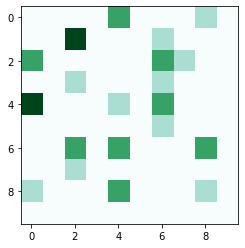

L1_norms:  [0.6   0.    0.689 0.    0.693 0.    0.63  0.077 0.466 0.   ]
mean and std:  [0.31550002, 0.3065212]


In [ ]:
def extract_M(model, filepath):
  model.load_weights(filepath)
  M = Model_discover.layers[0].weights[0].numpy().T
  plt.imshow(np.round(M,1), cmap='BuGn', interpolation='nearest')
  plt.show()
  L1_norms = np.round(np.sum(M,0),3)
  mean = np.mean(L1_norms)
  std = np.std(L1_norms)
  return L1_norms, mean, std
filepath='/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/Z5_Z10_32.h5'
L1_norms, mean, std = extract_M(Model_discover, filepath)
print('L1_norms: ',L1_norms)
print('mean and std: ',[mean, std])

## Run Proposed
$$\mathbb{Z}_8 : \mathbb{Z}_{512} $$

        Train Error (4096 pts): 0.092
        Val Error: 0.087

        Train Error (64 pts): 0.09
        Val Error: 0.1329

In [ ]:
np.random.seed(2048)
Model_discover = Simple_FC()
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')

In [ ]:
try:
    del Model_discover
    #gc.collect()
except:
    print("Do nothing")

np.random.seed(2048)
Model_discover = GroupInvarianceProposed(Z512, 64)
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')

Do nothing


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_ds.shape, train_y.shape, val_ds.shape, val_y.shape

((16, 16), (16,), (480, 16), (480,))

In [ ]:
Model_discover.summary()

In [ ]:
patience = 250
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
Model_discover.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y)) #callbacks=[reduce_lr])

In [ ]:
M_discover_8_16_pts_128 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_8_16_pts_128,1)),0))
print("Matrix M:",np.round(M_discover_8_16_pts_128,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
#indices = np.array([0, 1, 3, 6, 7, 10, 12, 13]).astype(np.int64)
plt.imshow(M_discover_8_16_pts_128, cmap='BuGn', interpolation='nearest')
plt.show()

In [ ]:
#indices = np.array([0, 3, 6, 13]).astype(np.int64)#np.arange(5).astype(np.int64)\
#indices = np.array([0, 1, 3, 6, 7, 10, 12, 13])
np.round(np.sum(M_discover_8_16_pts_128,0), 3), np.mean(np.round(np.sum(M_discover_8_16_pts_128,0), 3)), np.std(np.round(np.sum(M_discover_8_16_pts_128,0), 3))

(array([0.186, 0.196, 0.   , 0.2  , 0.004, 0.011, 0.177, 0.247, 0.   ,
        0.049, 0.259, 0.012, 0.209, 0.147, 0.014, 0.028], dtype=float32),
 0.108687505,
 0.09758824)

## Run Proposed
$$\mathbb{Z}_8 : \mathbb{Z}_{16} $$

        Train Error (4096 pts): 0.092
        Val Error: 0.087

        Train Error (64 pts): 0.09
        Val Error: 0.1329

In [ ]:
try:
    del Model_discover
    #gc.collect()
except:
    print("Do nothing")

np.random.seed(2048)
Model_discover = GroupInvarianceProposed(Z16, 64)
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')

In [ ]:
filepath='/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/Z8_Z16_64_v0.h5'
callback=tf.keras.callbacks.ModelCheckpoint(
    filepath,
    save_best_only = True,
    save_weights_only = True,)

In [ ]:
patience = 200
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
Model_discover.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y), callbacks=[callback])

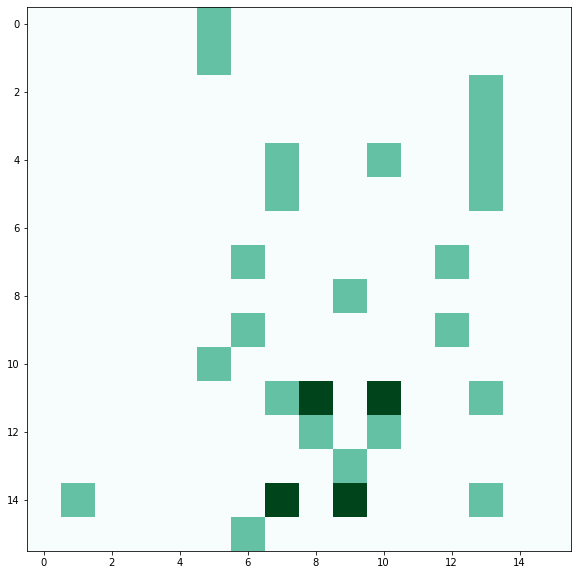

L1_norms:  [0.    0.126 0.051 0.001 0.063 0.31  0.383 0.432 0.409 0.399 0.403 0.
 0.392 0.549 0.064 0.   ]
mean and std:  [0.223875, 0.19332482]


In [ ]:
def extract_M(model, filepath, imagePath):
  model.load_weights(filepath)
  M = Model_discover.layers[0].weights[0].numpy().T
  width = 10
  height = 10
  plt.figure(figsize=(width, height))  
  plt.imshow(np.round(M,1), cmap='BuGn', interpolation='nearest')
  plt.savefig(imagePath, dpi=400, transparent=False)
  plt.show()
  L1_norms = np.round(np.sum(M,0),3)
  mean = np.mean(L1_norms)
  std = np.std(L1_norms)
  return L1_norms, mean, std
filepath='/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/Z8_Z16_64_v0.h5'
imagePath = '/content/gdrive/MyDrive/DeepSetsData/Sym_Poly/M_Z8_Z16_64_v0.png'
L1_norms, mean, std = extract_M(Model_discover, filepath, imagePath)
print('L1_norms: ',L1_norms)
print('mean and std: ',[mean, std])
#[5, 6, 7, 8, 9, 10, 12, 13]

In [ ]:
#indices = np.array([0, 3, 6, 13]).astype(np.int64)#np.arange(5).astype(np.int64)\
#indices = np.array([0, 1, 3, 6, 7, 10, 12, 13])
np.round(np.sum(M_discover_8_16_pts_128,0), 3), np.mean(np.round(np.sum(M_discover_8_16_pts_128,0), 3)), np.std(np.round(np.sum(M_discover_8_16_pts_128,0), 3))

(array([0.186, 0.196, 0.   , 0.2  , 0.004, 0.011, 0.177, 0.247, 0.   ,
        0.049, 0.259, 0.012, 0.209, 0.147, 0.014, 0.028], dtype=float32),
 0.108687505,
 0.09758824)

In [ ]:
def get_matrix(matrix):
  #indices = np.array([0, 3, 6, 13]).astype(np.int64)#np.arange(5).astype(np.int64)\
  #indices = np.array([0, 1, 3, 6, 7, 10, 12, 13])
  L1_norm = np.sum(M_discover_8_16_pts_16,0)
  column_mean = np.mean(np.sum(M_discover_8_16_pts_16,0))
  estimated_indices = np.where(L1_norm>=column_mean)
  k = len(estimated_indices[0])
  n = len(L1_norm)
  P = np.zeros((n,n))
  for i,j in zip(np.arange(k),estimated_indices[0]):
    P[i,j]=1
  M_matrix=np.tile(P[0:k,:],(n//k,1))
  return M_matrix   

In [ ]:
M_discover_8_16_pts_16 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_8_16_pts_16,1)),0))
print("Matrix M:",np.round(M_discover_8_16_pts_16,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
#indices = np.array([0, 1, 3, 6, 7, 10, 12, 13]).astype(np.int64)
plt.imshow(M_discover_8_16_pts_16, cmap='BuGn', interpolation='nearest')
plt.show()

## Run Proposed
$$\mathbb{Z}_4 : \mathbb{Z}_{16} $$

        Train Error (4096 pts): 0.092
        Val Error: 0.087

        Train Error (64 pts): 0.09
        Val Error: 0.1329

In [ ]:
try:
    del Model_discover
    #gc.collect()
except:
    print("Do nothing")

np.random.seed(2048)
Model_discover = GroupInvarianceProposed(Z16, 64)
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')

Do nothing


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
try:
    del Model_discover
    #gc.collect()
except:
    print("Do nothing")

np.random.seed(2048)
Model_discover = Simple_FC()
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')

In [ ]:
filepath='./Z4_Z16_32.h5'
callback=tf.keras.callbacks.ModelCheckpoint(
    filepath,
    save_best_only = True,
    save_weights_only = True,)

In [ ]:
patience = 200
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
Model_discover.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y), callbacks=[callback])

In [ ]:
patience = 250
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
Model_discover.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y), callbacks=[callback])

1/1 [==============================] - 0s 149ms/step


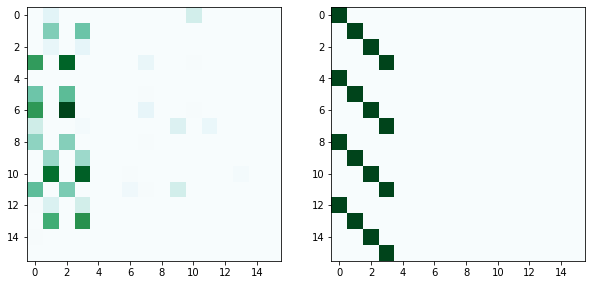

In [ ]:
filepath='/content/gdrive/MyDrive/DeepSetsData/AllFinal_v1/Z4_Z16_32.h5'
dummy = Model_discover.predict(train_ds)
Model_discover.load_weights(filepath)
M_discover_4_16_pts_32 = Model_discover.layers[0].weights[0].numpy().T
width = 10
height = 5
plt.figure(figsize=(width, height))
plt.subplot(121)
plt.imshow(M_discover_4_16_pts_32, cmap='BuGn', interpolation='nearest')
M_proper = get_matrix(M_discover_4_16_pts_32)
plt.subplot(122)
plt.imshow(M_proper, cmap='BuGn', interpolation='nearest')
plt.savefig("/content/gdrive/MyDrive/DeepSetsData/AllFinal_v1/small_size_both_matrices.png", dpi=400, transparent=False)
plt.show()

locs: [1 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0]
Matrix M: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1

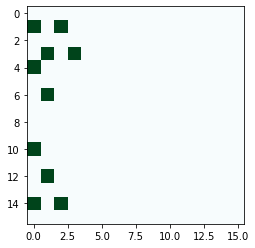

In [ ]:
filepath='Z4_Z16_512_m5_l1.h5'
Model_discover.load_weights(filepath)
M_discover_4_16_pts_512_original = Model_discover.layers[0].weights[0].numpy().T
M_discover_4_16_pts_512 = 0*M_discover_4_16_pts_512_original
M_discover_4_16_pts_512[np.where(M_discover_4_16_pts_512_original>=0.7)] = 1
print("locs:",np.argmax(np.abs(np.round(M_discover_4_16_pts_512,1)),0))
print("Matrix M:",np.round(M_discover_4_16_pts_512,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(np.round(M_discover_4_16_pts_512,1), cmap='BuGn', interpolation='nearest')
plt.show()

In [ ]:
np.round(np.sum(M_discover_4_16_pts_512,0),3), np.mean(np.sum(M_discover_4_16_pts_512,0)), np.std(np.sum(M_discover_4_16_pts_512,0))

(array([6.801, 6.582, 6.891, 6.608, 0.374, 0.038, 0.023, 0.696, 0.024,
        1.163, 0.99 , 0.279, 0.19 , 0.306, 0.038, 0.039], dtype=float32),
 1.9401368,
 2.7801244)

locs: [11  3 11  3  0  0  0  0  0  0  0  0  0  0  0  0]
Matrix M: [[ 0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
  -0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.1  0.   0.1  0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
  -0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
  -0.   0. ]
 [ 0.   0.1  0.   0.1  0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
  -0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.   0.   0.   0.   0.   0.   0.   0.   0.
  -0.   0. ]
 [ 0.   0.1  0.   0.1  0.  -0.   0.   0.   0.   0.   0.  -0.   0.   0.
  -0.   0. ]
 [ 0.1  0.

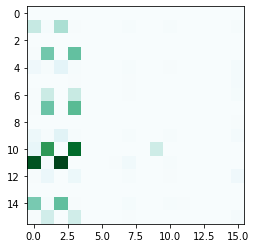

In [ ]:
filepath='Z4_Z16_64.h5'
Model_discover.load_weights(filepath)
M_discover_4_16_pts_64 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_4_16_pts_64,1)),0))
print("Matrix M:",np.round(M_discover_4_16_pts_64,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(M_discover_4_16_pts_64, cmap='BuGn', interpolation='nearest')
plt.show()

In [ ]:
np.round(np.sum(M_discover_4_16_pts_64,0),3), np.mean(np.sum(M_discover_4_16_pts_64,0)), np.std(np.sum(M_discover_4_16_pts_64,0))

(array([0.281, 0.332, 0.308, 0.367, 0.001, 0.   , 0.004, 0.021, 0.002,
        0.035, 0.008, 0.002, 0.005, 0.001, 0.   , 0.029], dtype=float32),
 0.08732847,
 0.1367902)

locs: [ 6 10  6 10  0  0  0  0  0  0  2  0  0  0  0  0]
Matrix M: [[ 0.  -0.   0.   0.   0.  -0.   0.   0.  -0.   0.   0.   0.  -0.  -0.
  -0.  -0. ]
 [ 0.   0.  -0.   0.  -0.  -0.   0.   0.  -0.  -0.   0.   0.  -0.  -0.
  -0.  -0. ]
 [ 0.   0.  -0.   0.  -0.  -0.  -0.   0.  -0.  -0.   0.1  0.  -0.  -0.
  -0.  -0. ]
 [ 0.  -0.   0.   0.   0.  -0.   0.   0.  -0.  -0.   0.   0.  -0.  -0.
  -0.  -0. ]
 [ 0.   0.1 -0.   0.1  0.  -0.   0.   0.  -0.  -0.   0.   0.  -0.  -0.
  -0.  -0. ]
 [ 0.   0.1 -0.   0.1  0.  -0.   0.   0.  -0.  -0.   0.  -0.   0.   0.
  -0.  -0. ]
 [ 0.1 -0.   0.1  0.   0.  -0.   0.   0.  -0.   0.   0.   0.  -0.  -0.
  -0.  -0. ]
 [ 0.1 -0.   0.1  0.   0.  -0.   0.   0.  -0.   0.   0.   0.  -0.  -0.
  -0.  -0. ]
 [ 0.   0.  -0.   0.   0.  -0.   0.   0.  -0.  -0.   0.   0.  -0.  -0.
  -0.  -0. ]
 [ 0.   0.  -0.   0.  -0.  -0.   0.   0.  -0.  -0.   0.   0.  -0.  -0.
  -0.  -0. ]
 [ 0.   0.2 -0.   0.2  0.  -0.   0.   0.  -0.   0.   0.  -0.   0.   0.
  -0.   0. ]
 [ 0.   0.

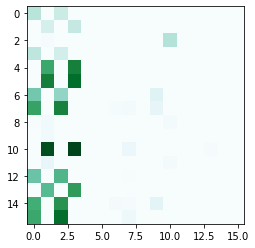

In [ ]:
Model_discover.load_weights(filepath)
M_discover_4_16_pts_32 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_4_16_pts_32,1)),0))
print("Matrix M:",np.round(M_discover_4_16_pts_32,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(M_discover_4_16_pts_32, cmap='BuGn', interpolation='nearest')
plt.show()

In [ ]:
def get_matrix(matrix):
  L1_norm=np.sum(matrix,0)
  mean=np.mean(L1_norm)
  est_idx=np.where(L1_norm>=mean)
  k=len(est_idx[0])
  n=len(matrix)
  P=np.zeros((n,n))
  for i,j in zip(np.arange(k),est_idx[0]):
    P[i,j]=1
  M=np.tile(P[0:k],(n//k,1))  
  return M

In [ ]:
M_proper=get_matrix(M_discover_4_16_pts_16)
filepath='Z4_Z16_32_retrained.h5'
callback=tf.keras.callbacks.ModelCheckpoint(
    filepath,
    save_best_only = True,
    save_weights_only = True,)

Model_discover = GroupInvarianceProposed(Z16, 64)
pred=Model_discover(train_ds)
bias = np.zeros((d,))
Model_discover.layers[0].set_weights([M_proper.T, bias])
Model_discover.layers[0].trainable=False
#Model_discover.layers[0].bias=False
patience = 250
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')
Model_discover.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y), callbacks=[callback])

locs: [0 1 2 3 0 0 0 0 0 0 0 0 0 0 0 0]
Matrix M: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


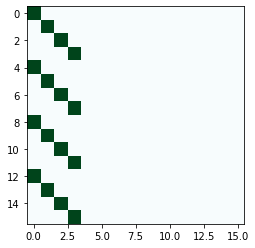

In [ ]:
Model_discover.load_weights(filepath)
M_discover_4_16_pts_32_R = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_4_16_pts_32_R,1)),0))
print("Matrix M:",np.round(M_discover_4_16_pts_32_R,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(M_discover_4_16_pts_32_R, cmap='BuGn', interpolation='nearest')
plt.show()

In [ ]:
#indices = np.array([0, 3, 6, 13]).astype(np.int64)#np.arange(5).astype(np.int64)
np.sum(M_discover_4_16_pts_32_R,0), np.mean(np.sum(M_discover_4_16_pts_32_R,0)), np.std(np.sum(M_discover_4_16_pts_32_R,0))

(array([1.487331  , 0.15100947, 0.09213524, 1.1928607 , 0.        ,
        0.        , 1.6716325 , 0.        , 0.01060625, 0.        ,
        0.0036066 , 0.        , 0.04723004, 1.0608729 , 0.25785497,
        0.0314549 ], dtype=float32), 0.37541217, 0.58100426)

In [ ]:
M_proper=get_matrix(M_discover_4_16_pts_16)

## Run Proposed
$$\mathbb{Z}_5 : \mathbb{Z}_{10} $$

        Train Error (4096 pts): 0.092
        Val Error: 0.087

        Train Error (64 pts): 0.09
        Val Error: 0.1329

In [ ]:
try:
    del Model_discover
    #gc.collect()
except:
    print("Do nothing")

np.random.seed(2048)
Model_discover = GroupInvarianceProposed(Z10, 64)
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')

In [ ]:
patience = 250
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
Model_discover.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y),callbacks=[reduce_lr])

In [ ]:
Model_discover.summary()

In [ ]:
Model_discover.layers[0].weights[0].numpy()

array([[-0.00000000e+00, -0.00000000e+00,  1.64344564e-01,
        -0.00000000e+00,  3.99862111e-01,  3.75244133e-02,
        -0.00000000e+00, -0.00000000e+00,  5.49242757e-02,
         4.32574779e-01],
       [ 2.16745570e-01,  4.20134701e-02,  9.82799977e-02,
         1.38207421e-01,  8.45086202e-02,  2.11348087e-01,
         8.15661922e-02,  3.81208695e-02,  5.56362309e-02,
        -0.00000000e+00],
       [ 2.10300043e-01,  6.45136982e-02,  1.11615397e-01,
         3.74813020e-01,  2.96314247e-03,  8.01648647e-02,
         9.45182517e-02, -0.00000000e+00,  3.88585329e-02,
         1.76070362e-01],
       [ 2.83901572e-01,  1.72558808e-04,  1.65148955e-02,
        -0.00000000e+00,  2.68397063e-01,  1.63296256e-02,
         1.58937961e-01,  2.57873863e-01,  1.76687747e-01,
         2.41622716e-01],
       [-0.00000000e+00,  3.82629156e-01,  5.48419077e-03,
         6.49949312e-02, -0.00000000e+00,  2.99993515e-01,
        -0.00000000e+00,  1.07380763e-01,  2.69144326e-01,
        -0.

locs: [4 0 3 0 1 0 9 0 4 3]
Matrix M: [[-0.   0.2  0.2  0.3 -0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.   0.   0.1  0.   0.4  0.  -0.  -0.  -0.  -0. ]
 [ 0.2  0.1  0.1  0.   0.   0.   0.  -0.   0.   0.1]
 [-0.   0.1  0.4 -0.   0.1  0.  -0.  -0.  -0.   0.2]
 [ 0.4  0.1  0.   0.3 -0.  -0.   0.  -0.   0.2 -0. ]
 [ 0.   0.2  0.1  0.   0.3  0.  -0.  -0.  -0.  -0. ]
 [-0.   0.1  0.1  0.2 -0.   0.   0.  -0.  -0.  -0. ]
 [-0.   0.  -0.   0.3  0.1  0.   0.  -0.  -0.  -0. ]
 [ 0.1  0.1  0.   0.2  0.3  0.  -0.  -0.   0.1 -0. ]
 [ 0.4 -0.   0.2  0.2 -0.  -0.   0.1 -0.  -0.  -0. ]]


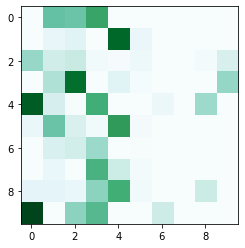

In [ ]:
M_discover_5_10 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_5_10,1)),0))
print("Matrix M:",np.round(M_discover_5_10,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(M_discover_5_10, cmap='BuGn', interpolation='nearest')
plt.show()

In [ ]:
np.sum(M_discover_5_10,0), np.mean(np.sum(M_discover_5_10,0)), np.std(np.sum(M_discover_5_10,0))

(array([1.0892301 , 0.9664265 , 1.1538173 , 1.4204379 , 1.1296269 ,
        0.11788511, 0.13756803, 0.        , 0.2793756 , 0.24926308],
       dtype=float32), 0.65436304, 0.5134678)

locs: [5 2 3 5 0 0 5 0 4 0]
Matrix M: [[-0.   0.   0.2 -0.   0.4  0.1 -0.  -0.   0.   0.1]
 [ 0.2  0.   0.1  0.   0.1  0.   0.  -0.   0.   0. ]
 [-0.   0.2  0.   0.2  0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.   0.2  0.3 -0.   0.4 -0.  -0.  -0.  -0.  -0. ]
 [ 0.1  0.   0.2  0.   0.1  0.  -0.  -0.   0.1  0. ]
 [ 0.4  0.1  0.   0.4 -0.  -0.   0.1 -0.   0.  -0. ]
 [-0.   0.   0.   0.4  0.1 -0.  -0.  -0.   0.1 -0. ]
 [ 0.   0.   0.1  0.1  0.1  0.  -0.  -0.   0.   0. ]
 [ 0.3  0.2  0.1  0.   0.  -0.  -0.  -0.   0.   0.1]
 [-0.   0.2  0.   0.2  0.  -0.  -0.  -0.  -0.   0. ]]


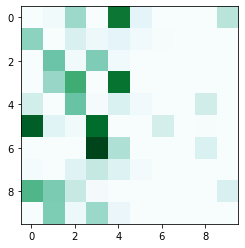

In [ ]:
M_discover_5_10 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_5_10,1)),0))
print("Matrix M:",np.round(M_discover_5_10,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(M_discover_5_10, cmap='BuGn', interpolation='nearest')
plt.show()

locs: [8 4 0 8 0 0 0 0 0 0]
Matrix M: [[ 0.   0.1  0.1  0.   0.2  0.   0.   0.   0.   0. ]
 [-0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.   0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0. ]
 [ 0.   0.2  0.   0.1  0.1  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0. ]
 [ 0.2  0.   0.1  0.2  0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.   0.1  0.   0.1  0.   0.   0.   0.   0. ]]


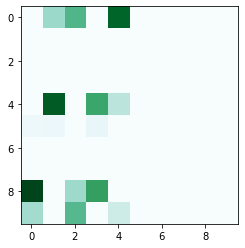

In [ ]:
M_discover_5_10 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_5_10,1)),0))
print("Matrix M:",np.round(M_discover_5_10,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(M_discover_5_10, cmap='BuGn', interpolation='nearest')
plt.show()

locs: [7 2 0 3 2 0 0 0 0 0]
Matrix M: [[ 0.   0.   0.1  0.   0.1  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.1  0.   0.   0.2  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.1  0.   0.   0.   0.   0.  -0. ]
 [ 0.   0.1  0.   0.1  0.   0.  -0.   0.   0.  -0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.1 -0.   0.   0.   0.   0.  -0. ]
 [ 0.1  0.   0.1  0.1 -0.   0.   0.   0.   0.  -0. ]
 [ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0. ]]


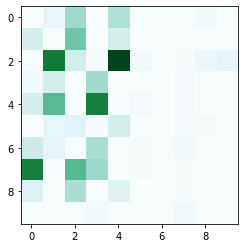

In [ ]:
M_discover_5_10 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_5_10,1)),0))
print("Matrix M:",np.round(M_discover_5_10,1))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(M_discover_5_10, cmap='BuGn', interpolation='nearest')
plt.show()

locs: [3 0 7 5 2 1 0 4 1 4]
Matrix M: [[ 0.    0.    0.32  0.44  0.01  0.    0.    0.    0.   -0.  ]
 [ 0.21  0.    0.15  0.    0.01  0.    0.04  0.09 -0.    0.  ]
 [ 0.02 -0.   -0.   -0.    0.   -0.   -0.    0.26 -0.    0.08]
 [ 0.    0.    0.    0.    0.    0.25  0.13  0.12  0.14  0.01]
 [ 0.    0.    0.26  0.06  0.16  0.    0.   -0.    0.    0.11]
 [ 0.26  0.29  0.04  0.    0.    0.    0.02 -0.    0.    0.  ]
 [ 0.32  0.02  0.08  0.03  0.05  0.    0.    0.    0.14  0.  ]
 [ 0.23  0.08  0.17  0.05  0.32 -0.   -0.   -0.    0.02 -0.  ]
 [-0.    0.47  0.03  0.08 -0.   -0.    0.    0.21  0.01 -0.  ]
 [-0.    0.    0.01  0.08  0.28  0.08  0.   -0.    0.   -0.  ]]


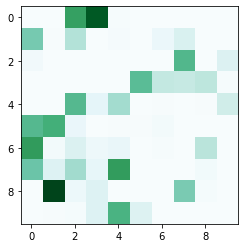

In [ ]:
M_discover_5_10 = Model_discover.layers[0].weights[0].numpy().T
print("locs:",np.argmax(np.abs(np.round(M_discover_5_10,2)),1))
print("Matrix M:",np.round(M_discover_5_10,2))
#Find arg max along each column
#8,1,0,9,5,3,6,4,7
plt.imshow(M_discover_5_10, cmap='BuGn', interpolation='nearest')
plt.show()

## Simple FC

In [ ]:
class Simple_FC(tf.keras.Model):
    def __init__(self):
        super(Simple_FC, self).__init__()
        activation = tf.keras.activations.tanh
        self.features = [
            #tf.keras.layers.Dense(10, activation),
            tf.keras.layers.Dense(89, activation),
            tf.keras.layers.Dense(6 * 64, activation),
            tf.keras.layers.Dense(32, activation),
            tf.keras.layers.Dense(1),
        ]

    def call(self, inputs):
        x = apply_layers(inputs, self.features)
        return x

## Run Simple FC
$$\mathbb{Z}_5 : \mathbb{Z}_{10} $$

        Train Error (4096 pts): --
        Val Error: --

In [ ]:
try:
    del Simple_FC_Model
    #gc.collect()
except:
    print("Do nothing")
    
np.random.seed(2048)
Simple_FC_Model = Simple_FC()
adam = Adam(lr=1e-3)
Simple_FC_Model.compile(optimizer=adam, loss='mae')

In [ ]:
train_ds.shape, train_y.shape, val_ds.shape, val_y.shape

((128, 10), (128,), (480, 10), (480,))

In [ ]:
patience = 50
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
Simple_FC_Model.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y))#, callbacks=[reduce_lr])

Streaming output truncated to the last 5000 lines.
8/8 [==============================] - 0s 21ms/step - loss: 0.5685 - val_loss: 0.3384
Epoch 2/2500
8/8 [==============================] - 0s 13ms/step - loss: 0.3776 - val_loss: 0.3744
Epoch 3/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.3700 - val_loss: 0.3180
Epoch 4/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.2971 - val_loss: 0.3617
Epoch 5/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.2763 - val_loss: 0.2947
Epoch 6/2500
8/8 [==============================] - 0s 13ms/step - loss: 0.2512 - val_loss: 0.2865
Epoch 7/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.2434 - val_loss: 0.2595
Epoch 8/2500
8/8 [==============================] - 0s 13ms/step - loss: 0.2513 - val_loss: 0.2651
Epoch 9/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.2655 - val_loss: 0.2521
Epoch 10/2500
8/8 [==============================] - 0s 10ms/step - los

In [ ]:
Simple_FC_Model.summary()

Model: "simple_fc_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            multiple                  110       
                                                                 
 dense_75 (Dense)            multiple                  979       
                                                                 
 dense_76 (Dense)            multiple                  34560     
                                                                 
 dense_77 (Dense)            multiple                  12320     
                                                                 
 dense_78 (Dense)            multiple                  33        
                                                                 
Total params: 48,002
Trainable params: 48,002
Non-trainable params: 0
_________________________________________________________________


## Group Avg + $M$

In [ ]:
lambda_val = 0.01
l2_reg = tf.keras.regularizers.l2(1e-5)
def groupAvereaging(inputs, operation):
    x = inputs
    a, b, c, d, e, f, g, h, i, j = tf.unstack(x, axis=1)

    # Z5 in S5
    x1 = x
    x2 = tf.stack([b, c, d, e, f, g, h, i, j, a], axis=1)
    x3 = tf.stack([c, d, e, f, g, h, i, j, a, b], axis=1)
    x4 = tf.stack([d, e, f, g, h, i, j, a, b, c], axis=1)
    x5 = tf.stack([e, f, g, h, i, j, a, b, c, d], axis=1)
    x6 = tf.stack([f, g, h, i, j, a, b, c, d, e], axis=1)
    x7 = tf.stack([g, h, i, j, a, b, c, d, e, f], axis=1)
    x8 = tf.stack([h, i, j, a, b, c, d, e, f, g], axis=1)
    x9 = tf.stack([i, j, a, b, c, d, e, f, g, h], axis=1)
    x10 = tf.stack([j, a, b, c, d, e, f, g, h, i], axis=1)

    x1 = operation(x1)
    x2 = operation(x2)
    x3 = operation(x3)
    x4 = operation(x4)
    x5 = operation(x5)    
    x6 = operation(x6)
    x7 = operation(x7)
    x8 = operation(x8)
    x9 = operation(x9)
    x10 = operation(x10)    

    x = tf.reduce_mean(tf.stack([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10], -1), -1)
    return x

class SimpleNet_M_Z10(tf.keras.Model):
    def __init__(self, d=10):
        self.d = d
        super(SimpleNet_M_Z10, self).__init__()
        activation = tf.keras.activations.tanh
        self.fc1 = tf.keras.layers.Dense(self.d, activation=None, 
                                         kernel_regularizer=tf.keras.regularizers.l1(lambda_val),
                                         kernel_constraint = nonneg())        
        self.features = [
            tf.keras.layers.Dense(89, activation, kernel_regularizer=l2_reg),
            tf.keras.layers.Dense(6 * 32, activation, kernel_regularizer=l2_reg),
            tf.keras.layers.Dense(32, activation, kernel_regularizer=l2_reg),
            tf.keras.layers.Dense(1, kernel_regularizer=l2_reg),
        ]

    def process(self, x):
        x = apply_layers(x, self.features)
        return x

    def call(self, inputs):
        x = self.fc1(inputs)
        x = groupAvereaging(x, self.process)
        return x    

In [ ]:
try:
    del Model_discover
    #gc.collect()
except:
    print("Do nothing")

np.random.seed(2048)
Model_discover = SimpleNet_M_Z10()
adam = Adam(lr=1e-3)
Model_discover.compile(optimizer=adam, loss='mae')

In [ ]:
train_ds.shape, train_y.shape, val_ds.shape, val_y.shape

((64, 10), (64,), (480, 10), (480,))

In [ ]:
patience = 50
batch_size = 16
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=patience, min_lr=0.000001)
max_epochs = 2500
Model_discover.fit(train_ds, train_y, 
          epochs=max_epochs, batch_size=batch_size,
          shuffle=True, validation_data=(val_ds, val_y), callbacks=[reduce_lr])